# Import Functions and Libraries

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and Process the Dataset

In [4]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
train_normX = trainX.astype('float32')
test_normX = testX.astype('float32')
train_normX = train_normX / 255.0
test_normX = test_normX / 255.0

In [7]:
X_train_noisy = trainX + 0.25 * np.random.normal(size=trainX.shape)
X_test_noisy = testX + 0.25 * np.random.normal(size=testX.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
print(X_train_noisy.shape)
print(X_test_noisy.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)

X_train_noisy = X_train_noisy.reshape(60000, 784)
X_test_noisy = X_test_noisy.reshape(10000, 784)

(60000, 784)
(10000, 784)


# Train your Model

In [10]:
INPUT_SIZE = trainX.shape[1]
CODE_SIZE = 32
input_img = Input(shape=(INPUT_SIZE,))

encoded1 = Dense(128, activation='relu')(input_img) # 1st hidden
encoded2 = Dense(64, activation='relu')(encoded1) # 2nd hidden layer

encoded3 = Dense(CODE_SIZE, activation='relu')(encoded2) # Bottleneck

decoded1 = Dense(64, activation='relu')(encoded3)
decoded2 = Dense(128, activation='relu')(decoded1)

decoded3 = Dense(INPUT_SIZE, activation='relu')(decoded2)

autoencoder = Model(input_img, decoded3)
encoder = Model(input_img, encoded3)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train_noisy, trainX, epochs=25, batch_size=256, shuffle=True, validation_split=0.2, verbose=0)


# Use Your Model

313/313 [==============================] - 1s 1ms/step


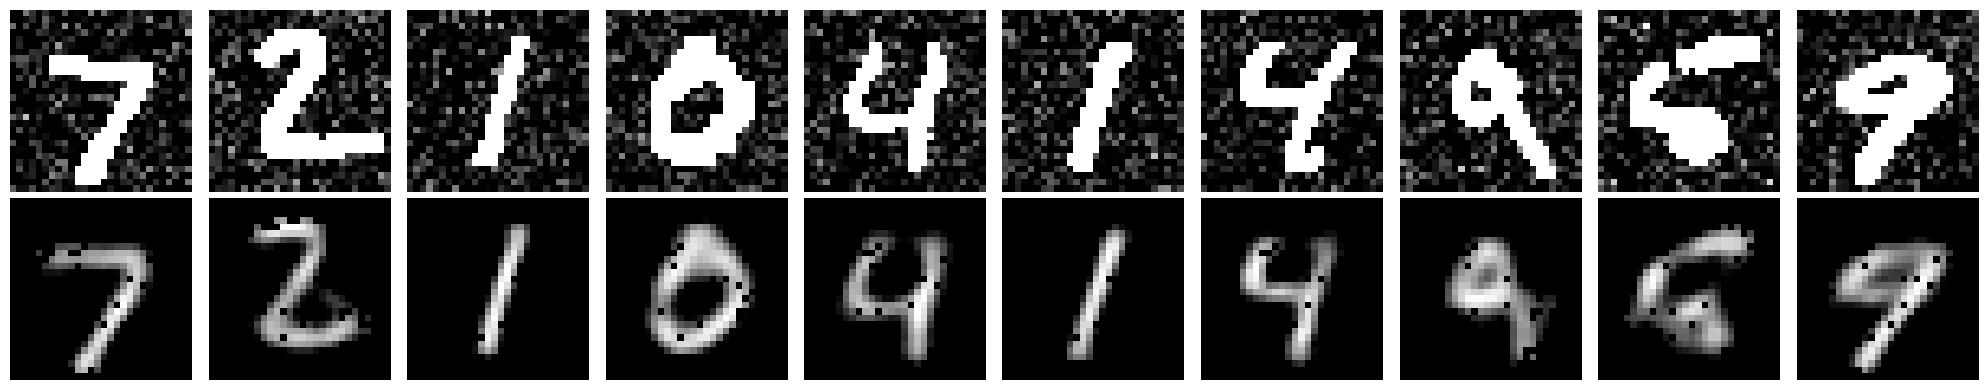

In [11]:
reconstructed_imgs = autoencoder.predict(X_test_noisy)

plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2, 10, i + 1)
  plt.imshow(X_test_noisy[i].reshape(28, 28))
  plt.gray()
  plt.axis('off')

  plt.subplot(2, 10, i + 1 + 10)
  plt.imshow(reconstructed_imgs[i].reshape(28,28))
  plt.gray()
  plt.axis('off')

plt.tight_layout()
plt.show()

The results are definitley less noisy but not totally clear. This is most likely a result of how many layers the model had. If there were more, the results would be a lot more similar to the lab, which had more layers.